In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.utils import to_categorical

# this module has the mnist data set
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print(train_images.shape)
print(test_images.shape)

170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
network = models.Sequential()

network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
network.add(layers.Conv2D(32, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.Conv2D(128, (3, 3), activation='relu'))

network.add(layers.Flatten())

network.add(layers.Dense(1024, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

network.compile(optimizers.RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 3, 3, 128)        

In [ ]:
x_train = train_images[:35000]
x_val = train_images[35000:]

y_train = train_labels[:35000]
y_val = train_labels[35000:]

In [ ]:
history = network.fit(x_train, y_train, epochs=20, batch_size=64, validation_data = (x_val, y_val))

Epoch 1/20
547/547 [==============================] - 7s 11ms/step - loss: 1.8496 - accuracy: 0.3113 - val_loss: 1.4596 - val_accuracy: 0.4657
Epoch 2/20
547/547 [==============================] - 5s 10ms/step - loss: 1.4023 - accuracy: 0.4937 - val_loss: 1.2927 - val_accuracy: 0.5287
Epoch 3/20
547/547 [==============================] - 5s 10ms/step - loss: 1.1848 - accuracy: 0.5824 - val_loss: 1.1786 - val_accuracy: 0.5916
Epoch 4/20
547/547 [==============================] - 5s 8ms/step - loss: 1.0281 - accuracy: 0.6399 - val_loss: 1.0972 - val_accuracy: 0.6129
Epoch 5/20
547/547 [==============================] - 5s 10ms/step - loss: 0.9078 - accuracy: 0.6841 - val_loss: 1.0422 - val_accuracy: 0.6493
Epoch 6/20
547/547 [==============================] - 5s 8ms/step - loss: 0.8192 - accuracy: 0.7148 - val_loss: 0.8970 - val_accuracy: 0.6989
Epoch 7/20
547/547 [==============================] - 5s 10ms/step - loss: 0.7424 - accuracy: 0.7429 - val_loss: 0.8969 - val_accuracy: 0.7036
E

In [ ]:
test_results = network.evaluate(test_images, test_labels)
print(test_results)

313/313 [==============================] - 2s 4ms/step - loss: 1.7882 - accuracy: 0.7085
[1.7881996631622314, 0.7085000276565552]


In [ ]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

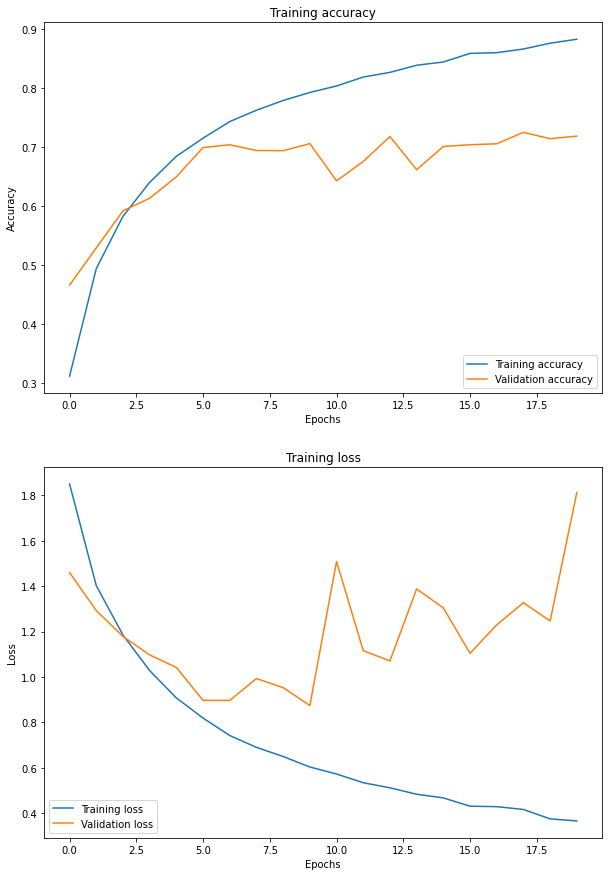

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].plot(acc_values, label="Training accuracy")
ax[0].plot(val_acc_values, label="Validation accuracy")
ax[0].set_title("Training accuracy")
ax[0].legend(loc='lower right')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].plot(loss_values, label="Training loss")
ax[1].plot(val_loss_values, label="Validation loss")
ax[1].set_title("Training loss")
ax[1].legend(loc='lower left')

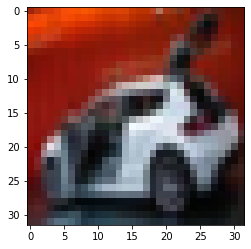

In [ ]:
test_image = test_images[6]
plt.imshow(test_image.reshape(32,32,3), cmap='gray')

(1, 32, 32, 3)


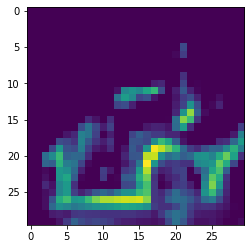

In [ ]:
layer_outputs = [layer.output for layer in network.layers]

activation_model = models.Model(inputs=network.input, outputs=layer_outputs)

test_image2 = test_image.reshape((1, 32, 32, 3))
print(test_image2.shape)
activations = activation_model.predict(test_image2)

plt.imshow(activations[0][0, :, :, 0])